<a href="https://colab.research.google.com/github/UZH-Cyrill-Meier/NetworkScience/blob/main/Assignments/assignment%205/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3


*   Tanja Gurtner - 17-677-295
*   Cyrill Georg Meier - 17-552-316

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from PIL import Image
import scipy.stats as stats
import random
import math

## Preparation
Download data from Git repository

In [2]:
import os
import requests

# GitHub repository and folder details
repo_owner = "UZH-Cyrill-Meier"
repo_name = "NetworkScience"
folder_path = "Assignments/assignment 5/datasets"

# GitHub API URL to get contents of the folder
api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{folder_path}"

# Base URL for raw file download
raw_base_url = f"https://raw.githubusercontent.com/{repo_owner}/{repo_name}/main/{folder_path}/"

# Local directory where you want to save the downloaded files
local_directory = "data"

# Create the local directory if it doesn't exist
if not os.path.exists(local_directory):
    os.makedirs(local_directory)

# Function to download a file from the raw GitHub URL
def download_file(file_name):
    file_url = raw_base_url + file_name
    local_path = os.path.join(local_directory, file_name)
    try:
        response = requests.get(file_url)
        response.raise_for_status()  # Check if the request was successful
        with open(local_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded: {local_path}")
    except Exception as e:
        print(f"Error downloading {file_name}: {e}")

# Get the list of files in the GitHub folder
response = requests.get(api_url)
if response.status_code == 200:
    files = response.json()
    for file_info in files:
        if file_info['type'] == 'file':  # Check if it's a file (not a directory)
            file_name = file_info['name']
            download_file(file_name)
else:
    print(f"Failed to retrieve folder contents: {response.status_code}")



Downloaded: data/.DS_Store
Downloaded: data/graph_Korea.gml
Downloaded: data/graph_dolphins.gml
Downloaded: data/graph_karate.gml
Downloaded: data/graph_madrid.gml
Downloaded: data/graph_starwars.gml


Get all existing files

In [25]:

directory = os.fsencode(local_directory)
titels = ['korea', 'dolphins', 'karate', 'madrid', 'starwars']
files = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".gml"):
        files.append(os.path.join(local_directory, filename))
        continue
    else:
        continue

Read all the files and add to dict `graphs`

In [4]:
graphs = []
for file in files:
  graphs.append(nx.read_gml(file))


In [5]:
graphs

### Datasets provided

- **graph_madrid.gml**: A network of associations among the terrorists involved in the 2004 Madrid train bombing, as reconstructed from press stories after-the-fact (Cardillo et al. [2013]).

- **graph_starwars.gml**: Network of interactions in Star Wars episode 4. Nodes are characters and edges represent a co-appearance in the same scene (Gabasova [2016]).

- **graph_korea.gml**: The network represents women in Korea discussing family planning. Edges represent a planning discussion (Sonquist [1984]).

- **graph_karate.gml**: Nodes represent members of a Karate club, and Edges represent a tie between two members (Zachary [1977]).

- **graph_dolphins.gml**: Dolphin social network: Nodes represent dolphins and Edges represent frequent associations observed among a group of 62 individuals (Lusseau et al. [2003]).


# Exercise 1
**(3 points)** For the provided network datasets, find the communities using (a) the greedy modularity maximization by Clauset Newman and Moore (Clauset et al. [2004]) and (b) the label propagation algorithm. Assign to each community a color and draw the resulting graph, where each node is colored after the community it belongs to, while community internal links and inter-communities links are clearly recognizable.

*Hint*: in order to make the visualization meaningful, tune nodes and links colors, e.g., internal links are black and external links are light gray.

*Hint*:
The greedy modularity maximization algorithm (Clauset et al. [2004]) is available as `greedy_modularity_communities()`.  
Label propagation algorithm is available as `label_propagation_communities()`.


In [10]:
# Step 2: Find communities using greedy modularity maximization
all_communities = []
for graph in graphs:
 all_communities.append(list(nx.algorithms.community.greedy_modularity_communities(graph)))


In [31]:
# Function to plot communities with distinct node colors and tuned link colors
def plot_colored_communities(graph, communities, title):
    pos = nx.spring_layout(graph)  # Layout for graph nodes
    plt.figure(figsize=(10, 10))

    # Generate a unique color for each community
    colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(communities))]

    # Convert communities to a dictionary for quick lookup
    node_community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            node_community_map[node] = i

    # Draw nodes, each community with a different color
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(graph, pos, nodelist=list(community), node_color=colors[i], node_size=100, alpha=0.9)

    # Draw edges
    internal_edges = []
    external_edges = []
    for u, v in graph.edges():
        # Check if the two nodes belong to the same community
        same_community = any(u in community and v in community for community in communities)

        if same_community:
            internal_edges.append((u, v))  # Internal edges (same community)
        else:
            external_edges.append((u, v))  # External edges (different communities)

    # Draw internal edges (within the same community) in black
    nx.draw_networkx_edges(graph, pos, edgelist=internal_edges, edge_color="black", alpha=0.6)

    # Draw external edges (between different communities) in light gray
    nx.draw_networkx_edges(graph, pos, edgelist=external_edges, edge_color="lightgray", alpha=0.3)

    plt.title(title)
    plt.show()


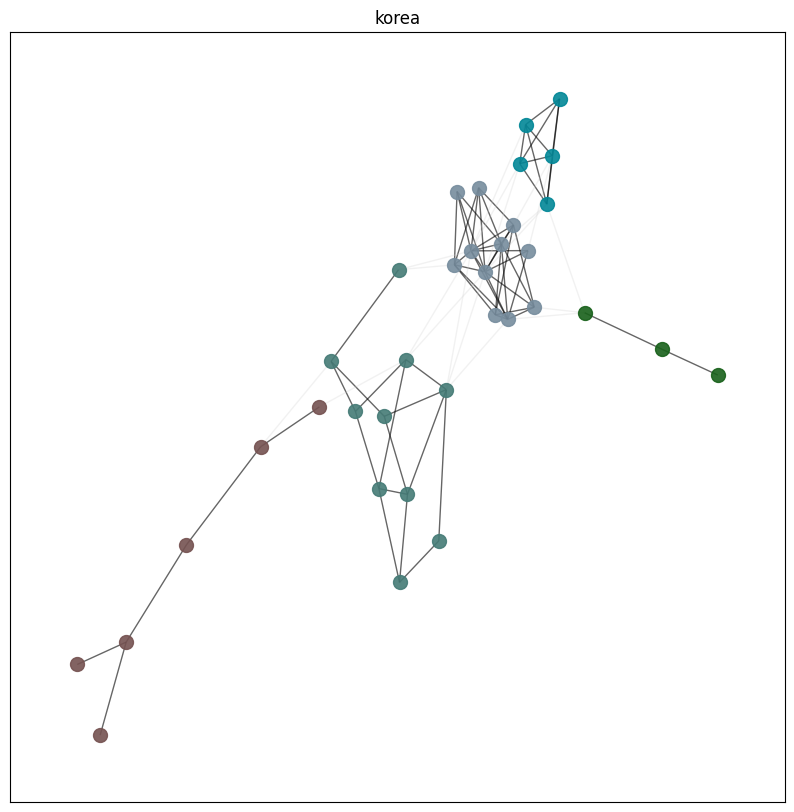

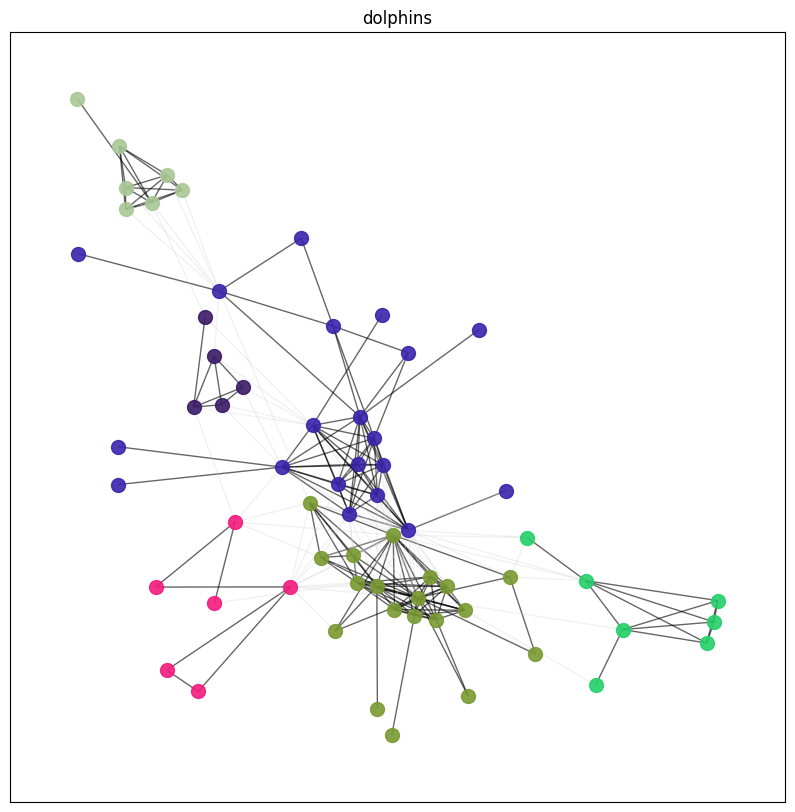

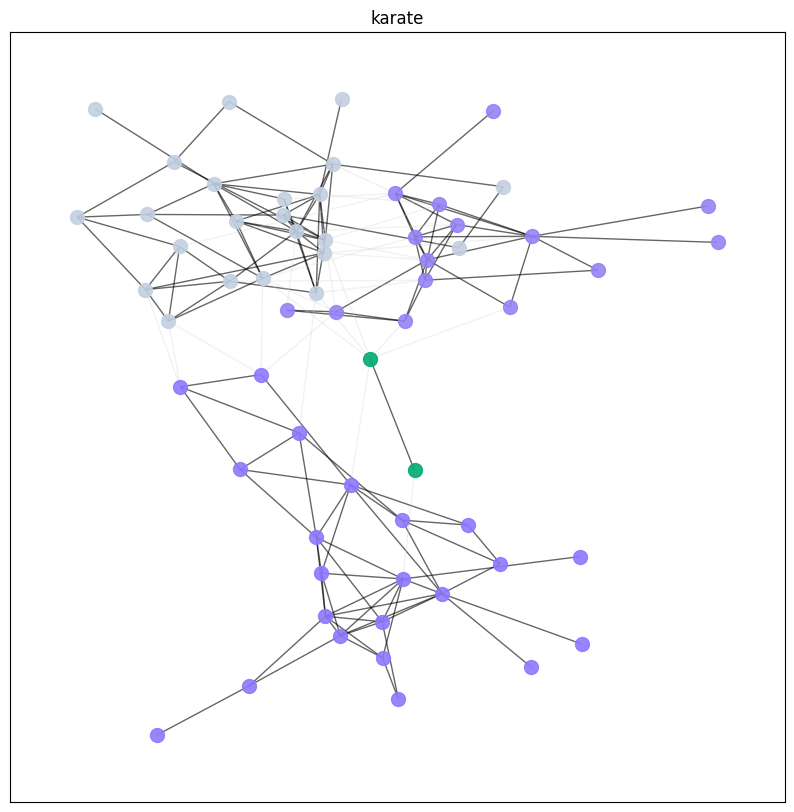

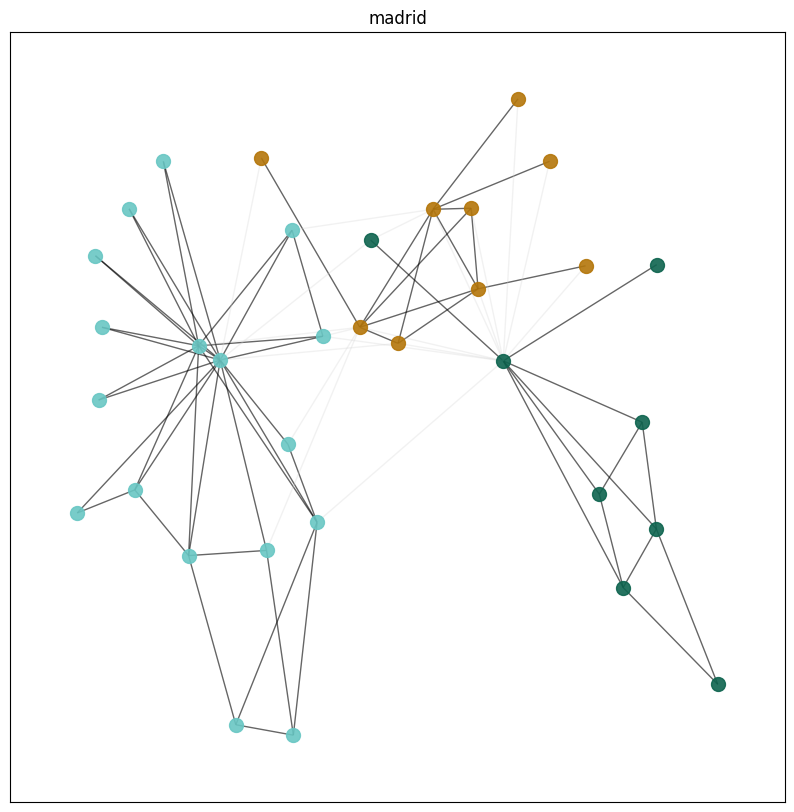

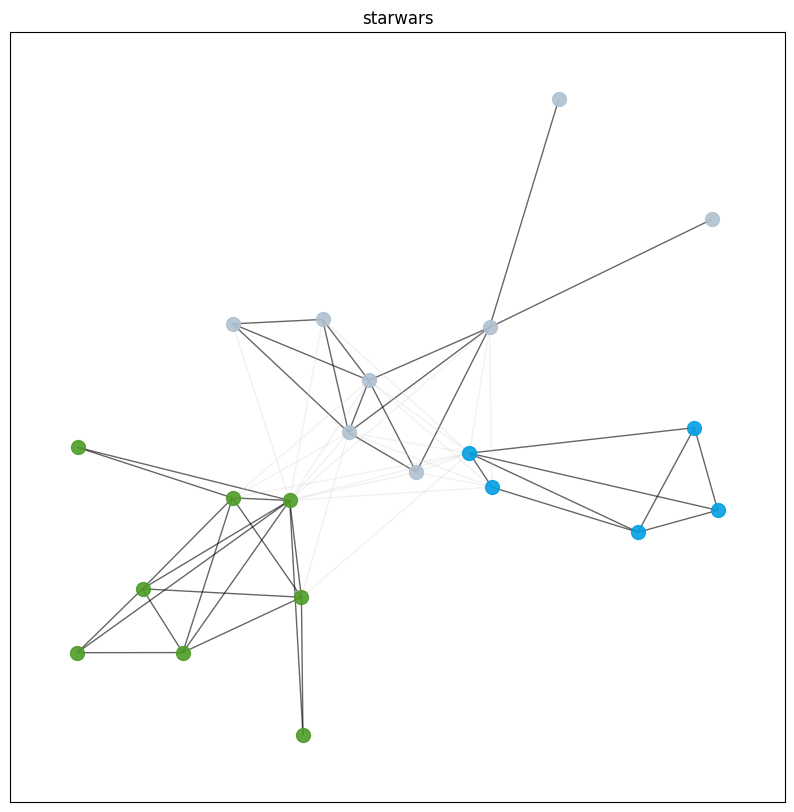

In [34]:
for graph, communities, titel in zip(graphs, all_communities, titels):
  plot_colored_communities(graph, communities, titel)


#Exercise 2
**(3 points)** Randomize each network and repeat the exercise at point (1). Compare the number of communities obtained before and after randomization and the quality of community detection before and after randomization.
